In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math

In [23]:
acc = pd.read_csv('accommodation.csv')
acc.head()

,Price,Bedrooms,Bathrooms,type,address,deposit,available_date,rooms_available,Gas,Electricity,...,Fire alarm,Garden,Off road parking,Garage,Wifi,Sky/Cable package,Energy performance certificate,Gas safe registered,Electrical safety certificate,NRLA registered
0,120.0,4.0,1.0,house,"Adderley road, Clarendon park, Leicester, LE21WD",300.0,1st July 2024,4.0,Yes,Yes,...,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No
1,109.0,4.0,1.0,house,"Pybus Street, University of Derby, Derby, DE223BD",150.0,1st July 2024,4.0,Yes,Yes,...,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No
2,123.0,5.0,2.0,house,"Sheffield Road, Near university, Portsmouth, P...",123.0,1st August 2024,1.0,Yes,Yes,...,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes
3,130.0,6.0,2.0,house,"Marle Hill Parade, Francis Close Hall, Chelten...",296.0,12th July 2024,6.0,Yes,Yes,...,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes
4,125.0,5.0,1.0,house,"Somers road, Southsea, Portsmouth, PO54PX",300.0,8th August 2024,5.0,Yes,Yes,...,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes


In [24]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           6311 non-null   float64
 1   Bedrooms                        6311 non-null   float64
 2   Bathrooms                       6311 non-null   float64
 3   type                            6311 non-null   object 
 4   address                         6310 non-null   object 
 5   deposit                         3523 non-null   float64
 6   available_date                  5151 non-null   object 
 7   rooms_available                 6311 non-null   float64
 8   Gas                             6324 non-null   object 
 9   Electricity                     6324 non-null   object 
 10  Water                           6324 non-null   object 
 11  Internet                        6324 non-null   object 
 12  Fridge                          63

In [25]:
acc.describe()

,Price,Bedrooms,Bathrooms,deposit,rooms_available
count,6311.000000,6311.000000,6311.000000,3523.000000,6311.000000
mean,148.027328,3.894153,2.049279,313.994107,3.926478
std,64.740230,2.207439,1.561709,239.425107,2.302960
min,61.150000,1.000000,1.000000,14.500000,1.000000
25%,110.000000,2.000000,1.000000,150.000000,2.000000
50%,130.000000,4.000000,1.000000,250.000000,4.000000
75%,163.000000,6.000000,2.000000,450.000000,6.000000
max,785.000000,9.000000,9.000000,1884.000000,14.000000


# Data Cleaning

In [26]:
acc = acc.dropna(subset=['Price'])

In [27]:
acc.available_date.value_counts()

available_date
1st July 2024          1752
1st September 2024      740
2nd September 2024      264
1st August 2024         213
14th September 2024     200
                       ... 
7th May 2024              1
17th May 2024             1
23rd April 2024           1
27th June 2024            1
5th June 2024             1
Name: count, Length: 164, dtype: int64

In [28]:
acc['month'] = acc['available_date'].apply(lambda x: str(x).split(' ')[1] if str(x) != 'nan' else x)
acc['year'] = acc['available_date'].apply(lambda x: str(x).split(' ')[2] if str(x) != 'nan' else x)
acc = acc.drop('available_date', axis=1)

In [29]:
acc['city'] = acc['address'].apply(lambda x: str(x).split(',')[-2] if str(x) != 'nan' else x)
acc.head()

,Price,Bedrooms,Bathrooms,type,address,deposit,rooms_available,Gas,Electricity,Water,...,Garage,Wifi,Sky/Cable package,Energy performance certificate,Gas safe registered,Electrical safety certificate,NRLA registered,month,year,city
0,120.0,4.0,1.0,house,"Adderley road, Clarendon park, Leicester, LE21WD",300.0,4.0,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,No,July,2024,Leicester
1,109.0,4.0,1.0,house,"Pybus Street, University of Derby, Derby, DE223BD",150.0,4.0,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,No,July,2024,Derby
2,123.0,5.0,2.0,house,"Sheffield Road, Near university, Portsmouth, P...",123.0,1.0,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,Yes,August,2024,Portsmouth
3,130.0,6.0,2.0,house,"Marle Hill Parade, Francis Close Hall, Chelten...",296.0,6.0,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,Yes,July,2024,Cheltenham
4,125.0,5.0,1.0,house,"Somers road, Southsea, Portsmouth, PO54PX",300.0,5.0,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,Yes,August,2024,Portsmouth


In [30]:
acc['postcode'] = acc['address'].apply(lambda x: (str(x).split(',')[-1].strip()[0:-3] + ' ' +  str(x).split(',')[-1].strip()[-3:]).upper() if str(x) != 'nan' else x)

In [31]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

geocode = []

for p in acc['postcode']:
    if p != 'nan':
        geocode.append(geolocator.geocode(p))
        time.sleep(1)
    else:
        geocode.append(p)

geocode = pd.Series(geocode)

In [32]:
# Upon inspection, they either have none as postcode or the postcode is no longer in use 
counter = -1
for g in geocode:
    counter += 1
    country = str(g).split(',')[-1]
    if country.strip() != 'United Kingdom':
        print(counter)
        print(g)
        # Remove these data
        geocode[counter] = None

38
연세로2나길, 창천동, 신촌동, 서대문구, 서울특별시, 04102, 대한민국
750
Chak 1EB, تحصیل عارف والہ, ضلع پاکپتن, ساہیوال ڈویژن, پنجاب, پاکستان
1447
Nanno, Ville d'Anaunia, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38093, Italia
1756
None
1760
None
1823
1215- Cardenal Copello (ex4), El Parque, Ingeniero Juan Allan, Partido de Florencio Varela, Buenos Aires, 1891, Argentina
2200
NG7, Chánh Phú Hòa, Phường Chánh Phú Hòa, Thành phố Bến Cát, Tỉnh Bình Dương, 75900, Việt Nam
2272
None
2354
None
2866
1215- Cardenal Copello (ex4), El Parque, Ingeniero Juan Allan, Partido de Florencio Varela, Buenos Aires, 1891, Argentina
3075
Electronics City Phase 1, Bangalore South, Bengaluru Urban, Karnataka, 560100, India


In [33]:
acc['latitude'] = geocode.apply(lambda x: x.latitude if x != None else x)
acc['longitude'] = geocode.apply(lambda x: x.longitude if x != None else x)

acc = acc.drop(['address'], axis=1)
acc.head()

,Price,Bedrooms,Bathrooms,type,deposit,rooms_available,Gas,Electricity,Water,Internet,...,Energy performance certificate,Gas safe registered,Electrical safety certificate,NRLA registered,month,year,city,postcode,latitude,longitude
0,120.0,4.0,1.0,house,300.0,4.0,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,July,2024,Leicester,LE2 1WD,52.616000,-1.122140
1,109.0,4.0,1.0,house,150.0,4.0,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,July,2024,Derby,DE22 3BD,52.928081,-1.498682
2,123.0,5.0,2.0,house,123.0,1.0,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,August,2024,Portsmouth,PO1 5DP,50.800150,-1.075510
3,130.0,6.0,2.0,house,296.0,6.0,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,July,2024,Cheltenham,GL50 4LG,51.906678,-2.074361
4,125.0,5.0,1.0,house,300.0,5.0,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,August,2024,Portsmouth,PO5 4PX,50.792949,-1.085845


In [36]:
acc.to_csv('acc.csv')

In [345]:
acc = pd.read_csv('acc.csv', index_col = 0)

In [346]:
acc['city'] = acc['city'].apply(lambda x: str(x).strip().capitalize())

In [347]:
acc['amenities'] = copy.stack().groupby(level=0).value_counts().unstack(fill_value=0)['Yes']

In [348]:
copy = acc.copy()
copy['Price'] = copy['Price'].apply(lambda x: 250 if x >= 250 else x)
copy['Price'].value_counts()

Price
250.00    343
115.00    269
125.00    251
130.00    234
135.00    226
         ... 
94.13       1
64.61       1
97.50       1
87.50       1
106.15      1
Name: count, Length: 274, dtype: int64

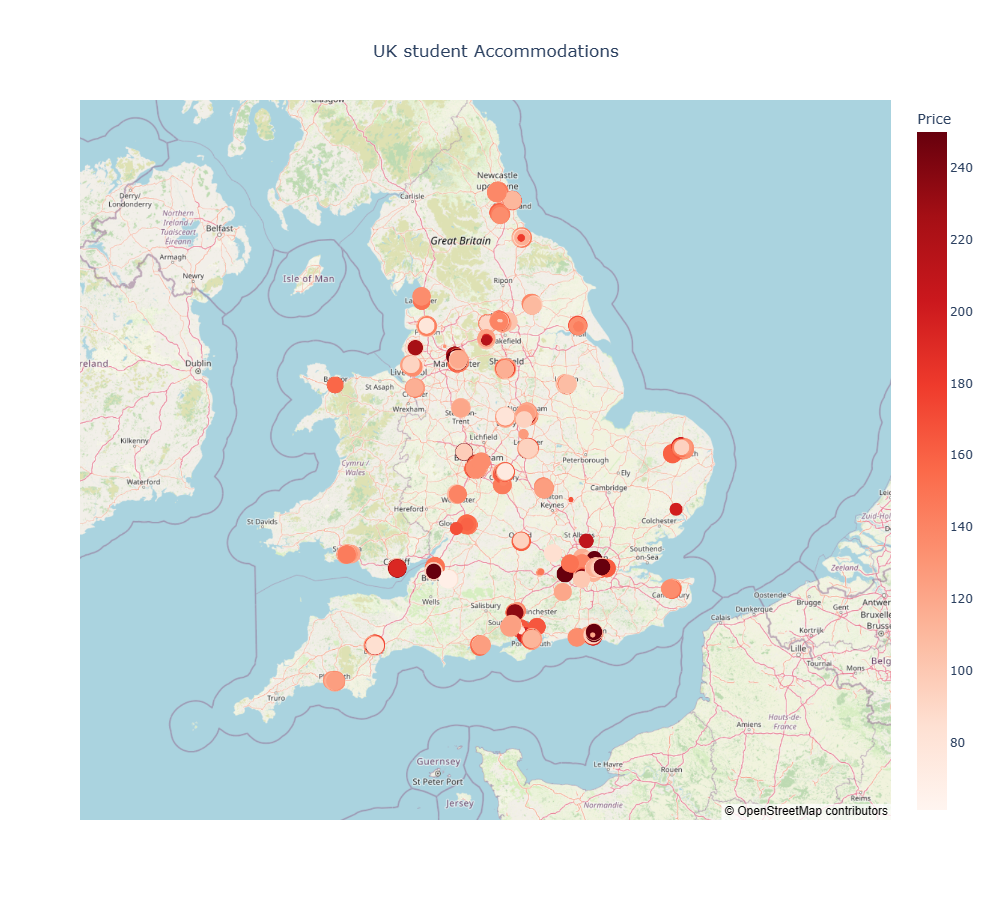

In [350]:
import plotly.express as px

fig = px.scatter_mapbox(copy, 
                        lon  = copy['longitude'],
                        lat = copy['latitude'],
                        color = copy['Price'],
                        size = copy['amenities'],
                        color_continuous_scale=px.colors.sequential.Reds,
                        size_max=15, 
                        zoom=5.5,
                        width = 1000,
                        height = 900,
                        opacity = 1,
                        title = 'UK student Accommodations')
fig.update_layout(mapbox_style='open-street-map')
fig.update(layout={'title': {'x': 0.5, 'y': 0.95}})

fig.show()

In [351]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6311 entries, 0 to 6323
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           6311 non-null   float64
 1   Bedrooms                        6311 non-null   float64
 2   Bathrooms                       6311 non-null   float64
 3   type                            6311 non-null   object 
 4   deposit                         3523 non-null   float64
 5   rooms_available                 6311 non-null   float64
 6   Gas                             6311 non-null   object 
 7   Electricity                     6311 non-null   object 
 8   Water                           6311 non-null   object 
 9   Internet                        6311 non-null   object 
 10  Fridge                          6311 non-null   object 
 11  Freezer                         6311 non-null   object 
 12  Oven                            6311 no

C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

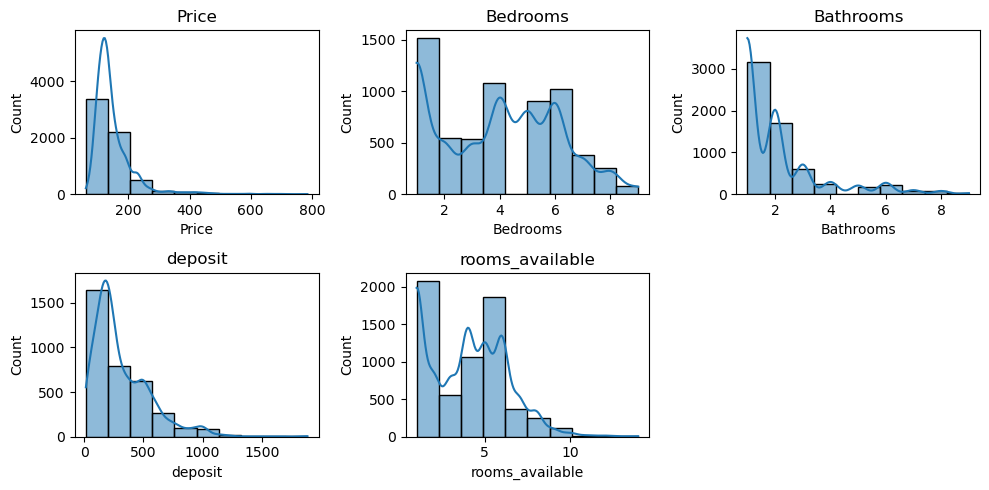

In [353]:
import seaborn as sns

numerical_features = ['Price', 'Bedrooms', 'Bathrooms', 'deposit', 'rooms_available']

plt.figure(figsize=(10, 5))
for feature in numerical_features:
    plt.subplot(2, 3, numerical_features.index(feature) + 1)
    sns.histplot(data=acc[feature], bins=10, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

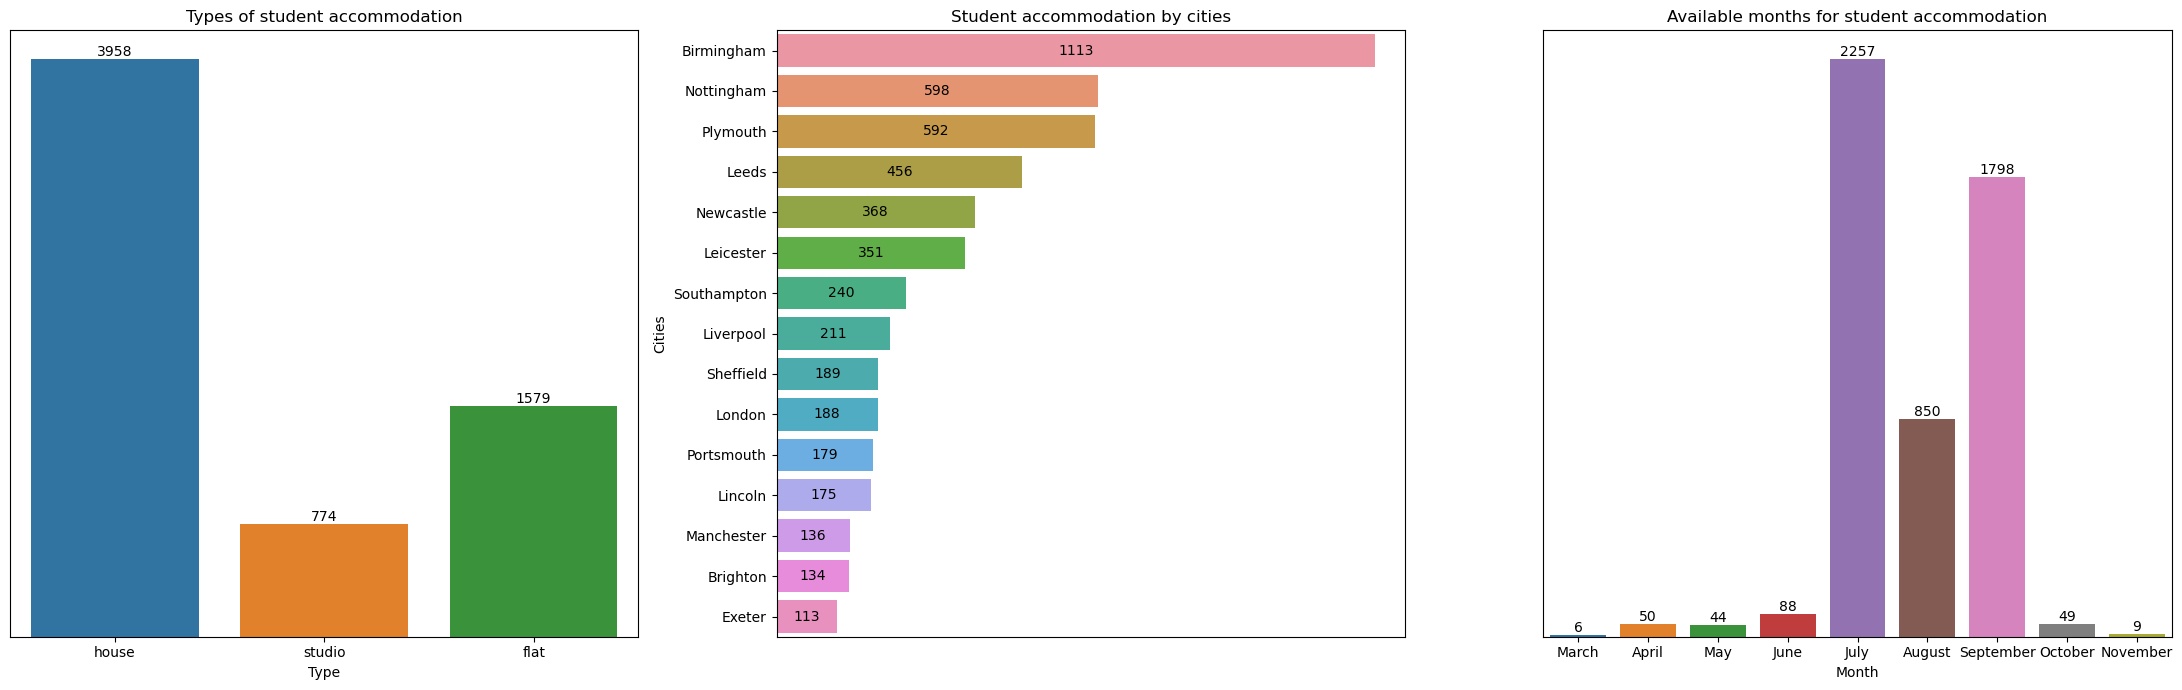

In [354]:
plt.figure(figsize=(22, 7))

plt.subplot(1,3,1)
ax = sns.countplot(x = 'type',data = acc)
ax.set(title = 'Types of student accommodation', xlabel = 'Type', yticks = ([]), ylabel = '')
ax.tick_params(axis='y', left=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1,3,2)


df = acc['city'].value_counts().head(15)
ax = sns.barplot(x = df.values,y = df.index)
ax.set(xticklabels=[],title = 'Student accommodation by cities', ylabel = 'Cities')
ax.tick_params(bottom=False)

for bars in ax.containers:
    ax.bar_label(bars, label_type='center')
    
plt.subplot(1,3,3)
ax = sns.countplot(x = 'month',data = acc, order = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November'])
ax.set(title = 'Available months for student accommodation', xlabel = 'Month', yticks = ([]), ylabel = '')
ax.tick_params(axis='y', left=False)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.tight_layout()

C:\Users\thoma\AppData\Local\Temp\ipykernel_11792\1851737272.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



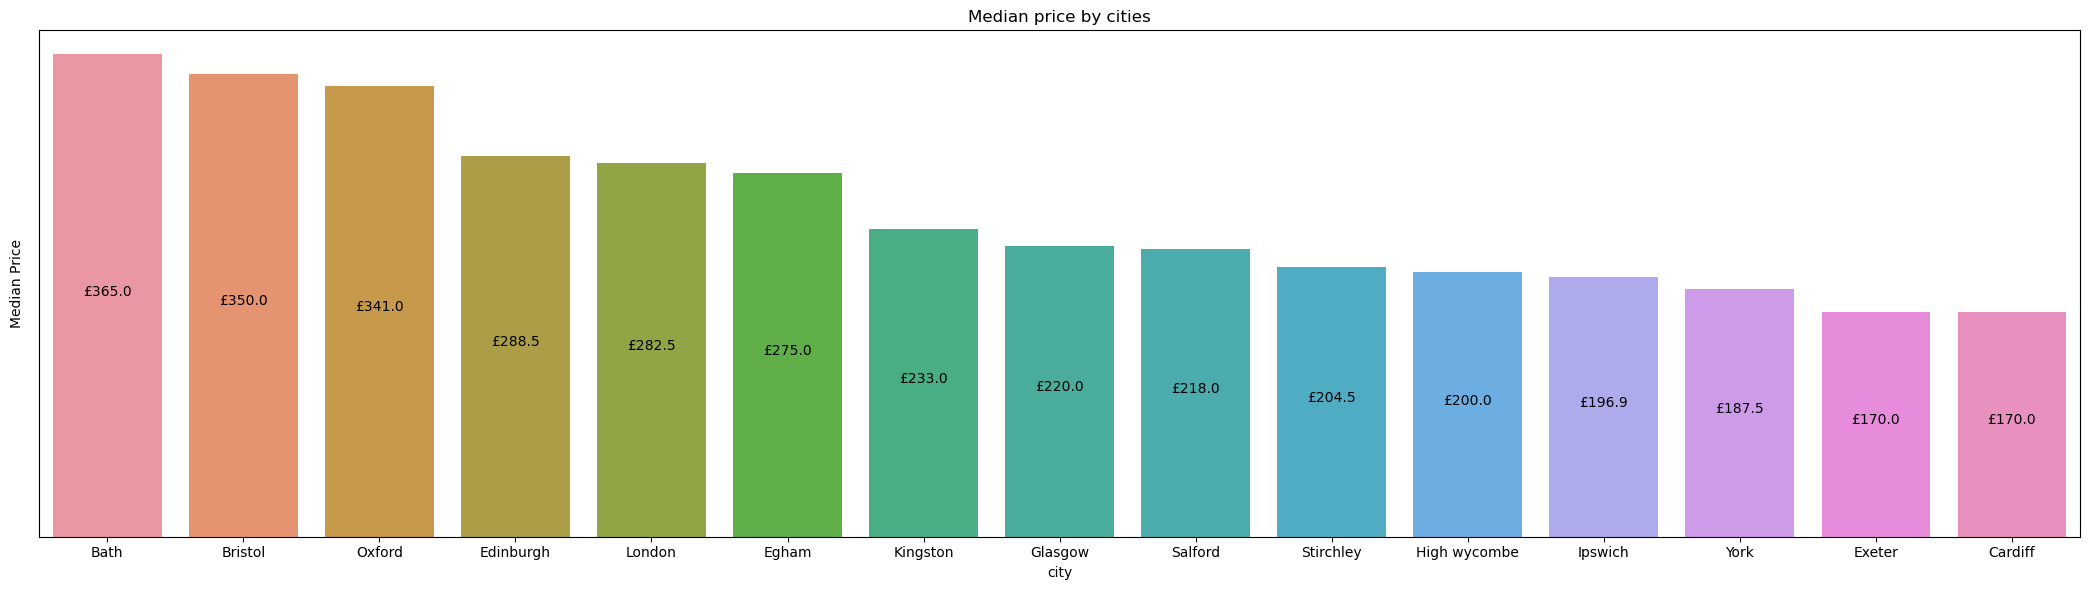

In [355]:
def vertical_plot(col):
    plt.figure(figsize=(21, 6))
    df = pd.DataFrame(acc.groupby([col]).agg({'Price': ['median', 'count']}))
    df = df.sort_values(by=('Price','median'), ascending=False).head(15)
    ax = sns.barplot(data=df, x=df.index, y=('Price','median'))
    ax.set(yticklabels = [], title = 'Median price by cities', ylabel='Median Price')
    ax.tick_params(left=False)

    for i in range(0,15):
        ax.text(i, df['Price']['median'][i]/2, '£' + str(df['Price']['median'][i]) ,ha='center')

    plt.tight_layout()
    plt.show()
    
vertical_plot('city')

<Axes: xlabel='type', ylabel='Price'>

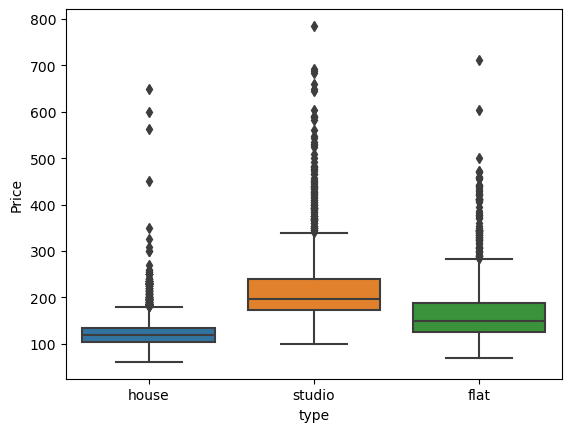

In [357]:
sns.boxplot(x = acc['type'], y = acc['Price'])

In [359]:
uk_unis = pd.read_csv('uk_universities.csv')
unis = uk_unis['University_name']

In [362]:
# from geopy.geocoders import Nominatim

# # Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

latitudes = {}
longitudes = {}

for u in unis:
    location = geolocator.geocode(u)
    if location != None:
        latitudes[u] = location.latitude
        longitudes[u] = location.longitude

In [365]:
acc=acc.reset_index(drop=True)

In [366]:
distances = []
universities = []
nearby_schools = []

for i in range(0, len(acc)):
    if math.isnan(acc['latitude'][i]) == False:
        coords_1 = (acc['latitude'][i], acc['longitude'][i])
        shortest_distance = 99999
        uni = ''
        counter = 0
        for u in unis:
            if u in latitudes.keys():
                coords_2 = (latitudes[u], longitudes[u])
                distance = geopy.distance.geodesic(coords_1, coords_2).km
                if distance <= shortest_distance:
                    shortest_distance = distance
                    uni = u
                if distance < 5:
                    counter += 1
        universities.append(uni)
        distances.append(shortest_distance)
        nearby_schools.append(counter)
    else:
        universities.append('Nan')
        distances.append('Nan')
        nearby_schools.append('Nan')

In [367]:
acc['uni_distance'] = distances
acc['nearby_schools'] = nearby_schools

In [368]:
acc.head()

,Price,Bedrooms,Bathrooms,type,deposit,rooms_available,Gas,Electricity,Water,Internet,...,NRLA registered,month,year,city,postcode,latitude,longitude,amenities,uni_distance,nearby_schools
0,120.0,4.0,1.0,house,300.0,4.0,Yes,Yes,Yes,Yes,...,No,July,2024.0,Leicester,LE2 1WD,52.616000,-1.122140,18,0.972695,2
1,109.0,4.0,1.0,house,150.0,4.0,Yes,Yes,Yes,Yes,...,No,July,2024.0,Derby,DE22 3BD,52.928081,-1.498682,23,1.099796,1
2,123.0,5.0,2.0,house,123.0,1.0,Yes,Yes,Yes,Yes,...,Yes,August,2024.0,Portsmouth,PO1 5DP,50.800150,-1.075510,21,1.384158,1
3,130.0,6.0,2.0,house,296.0,6.0,Yes,Yes,Yes,Yes,...,Yes,July,2024.0,Cheltenham,GL50 4LG,51.906678,-2.074361,23,10.953662,0
4,125.0,5.0,1.0,house,300.0,5.0,Yes,Yes,Yes,Yes,...,Yes,August,2024.0,Portsmouth,PO5 4PX,50.792949,-1.085845,22,0.600517,1


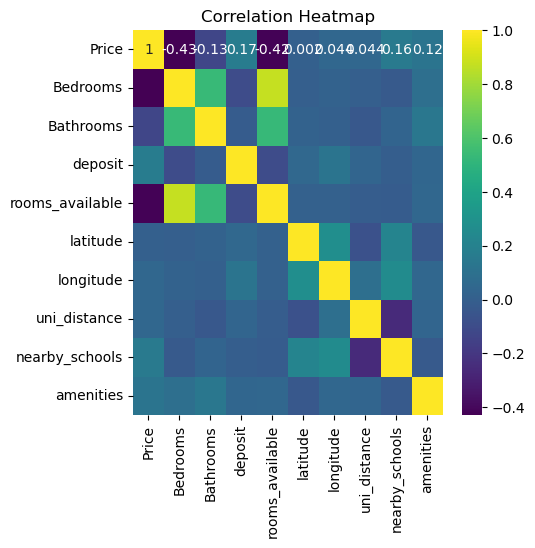

In [369]:
numerical_features = ['Price', 'Bedrooms', 'Bathrooms', 'deposit', 'rooms_available', 'latitude', 'longitude', 'uni_distance', 'nearby_schools', 'amenities']
plt.figure(figsize=(5, 5))
sns.heatmap(acc[numerical_features].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [370]:
from sklearn.model_selection import train_test_split

x = acc.drop(['Price'], axis = 1)
y = acc['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

In [395]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

cat_attribs = list(acc.iloc[:,6:33])
num_attribs = ['Bedrooms', 'deposit', 'latitude', 'longitude', 'uni_distance']

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('ordinal_encoder', OrdinalEncoder())
])

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('cat_pipeline', cat_pipeline),
    ('num_pipeline', num_pipeline),
])


In [396]:
x_train_prepared = full_pipeline.fit_transform(x_train)
x_test_prepared = full_pipeline.fit_transform(x_test)

In [398]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())